In [126]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

Current size: [6.0, 4.0]


In [147]:
# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size

In [2]:
train = pd.read_csv('./resnet_train_10_features.csv')
valid = pd.read_csv('./resnet_valid_10_features.csv')

In [3]:
train['type'] = train['fname'].str.split('/').apply(lambda x: x[0])

train['disease'] = train['fname'].str.split('/').apply(lambda x: x[1])

train['file'] = train['fname'].str.split('/').apply(lambda x: x[2])

train['pname'] = train['file'].str.split('___').apply(lambda x: x[0])

In [4]:
valid['type'] = valid['fname'].str.split('/').apply(lambda x: x[0])

valid['disease'] = valid['fname'].str.split('/').apply(lambda x: x[1])

valid['file'] = valid['fname'].str.split('/').apply(lambda x: x[2])

valid['pname'] = valid['file'].str.split('___').apply(lambda x: x[0])

In [136]:
train = pd.concat([train, valid])

In [137]:
biom = pd.read_excel('./EE Biomarkers from MAB/CohortBbiomarkersforSana - Copy.xlsx')

In [149]:
ee_train_bio

,0,1,2,3,4,5,6,7,8,9,fname,type,disease,file,pname,pid
50299,-3.759811,-3.756536,-4.458496,27.126250,-9.439900,-7.499892,-6.960905,-5.397956,3.434756,-3.070575,train/EE/130368_6720_001___4000_1000___500_250...,train,EE,130368_6720_001___4000_1000___500_250.jpg,130368_6720_001,6720
50307,-3.035037,-3.421697,2.081037,14.947639,-5.528777,-1.942452,-5.120157,-5.532870,0.432180,-3.093484,train/EE/130368_6720_001___5000_3000___500_500...,train,EE,130368_6720_001___5000_3000___500_500.jpg,130368_6720_001,6720
50311,-2.498990,-3.095515,7.341312,9.780178,-6.212730,-5.164940,-4.609642,-3.769921,-0.549933,-2.806488,train/EE/130380_6726_001___2000_763___250_0.jpg,train,EE,130380_6726_001___2000_763___250_0.jpg,130380_6726_001,6726
50312,-2.283768,-4.454656,-1.172820,18.263786,-4.513263,-0.433353,-3.401811,-3.827758,1.295071,-3.029784,train/EE/130369_6721_001___10000_9000___250_25...,train,EE,130369_6721_001___10000_9000___250_250.jpg,130369_6721_001,6721
50317,-1.985206,-3.392834,0.358245,17.116125,-6.556064,-6.089327,-3.478731,-2.284196,5.067651,-1.634830,train/EE/130368_6720_001___4000_12000___250_50...,train,EE,130368_6720_001___4000_12000___250_500.jpg,130368_6720_001,6720
50318,-1.835801,-2.418707,-0.548999,14.014583,-5.175277,-2.141463,-2.898323,-3.765509,3.454064,-0.753703,train/EE/130370_6722_001___12780_3000___0_250.jpg,train,EE,130370_6722_001___12780_3000___0_250.jpg,130370_6722_001,6722
50319,-0.883292,0.662201,-6.343509,7.991042,-4.812097,-7.488837,1.126896,-1.463472,11.130781,6.485714,train/EE/130366_6717_001___0_2000___500_500.jpg,train,EE,130366_6717_001___0_2000___500_500.jpg,130366_6717_001,6717
50320,1.430484,1.533855,-2.027907,-3.506730,1.728265,-1.887394,3.624563,4.738310,7.650520,4.774890,train/EE/130368_6720_001___5000_3000___0_0.jpg,train,EE,130368_6720_001___5000_3000___0_0.jpg,130368_6720_001,6720
50324,-2.395683,-3.683320,3.671895,13.352658,-7.602428,-4.306243,-6.168380,-5.474031,-1.759854,-2.831548,train/EE/130369_6721_001___6000_15000___500_50...,train,EE,130369_6721_001___6000_15000___500_500.jpg,130369_6721_001,6721
50327,2.205888,1.388808,-1.455202,-7.093828,3.939271,0.524649,4.523939,6.245110,5.760295,5.277454,train/EE/130369_6721_001___9000_9000___500_0.jpg,train,EE,130369_6721_001___9000_9000___500_0.jpg,130369_6721_001,6721


In [139]:
ee_train_bio = train[(train['disease']=='EE') & (train['pname'].str.len()==15)]

In [140]:
ee_train_bio['pid'] = ee_train_bio['pname'].str.split('_').apply(lambda x: x[1])

C:\Users\Saurav\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
img_cols = ['0','1','2','3','4','5','6','7','8','9']
ee_avg = ee_train_bio.groupby('pid')[img_cols].agg(np.mean).reset_index()

In [142]:
ee_avg['pid'] = ee_avg['pid'].astype(np.int64)

In [143]:
# ee_avg
merge_ee = ee_avg.merge(biom, left_on='pid', right_on='ID')
merge_ee = merge_ee.drop(['pid','ID','sex', 'oedema','breastfeeding', 'hivchild', 'lactasedef','pcrpos'], axis=1)
merge_ee = merge_ee.fillna(biom.median())

In [144]:
img_ee = merge_ee[img_cols]

biom_ee = merge_ee[[x for x in list(merge_ee.columns) if x not in img_cols]]
biom_ee = biom_ee.fillna(biom.median())

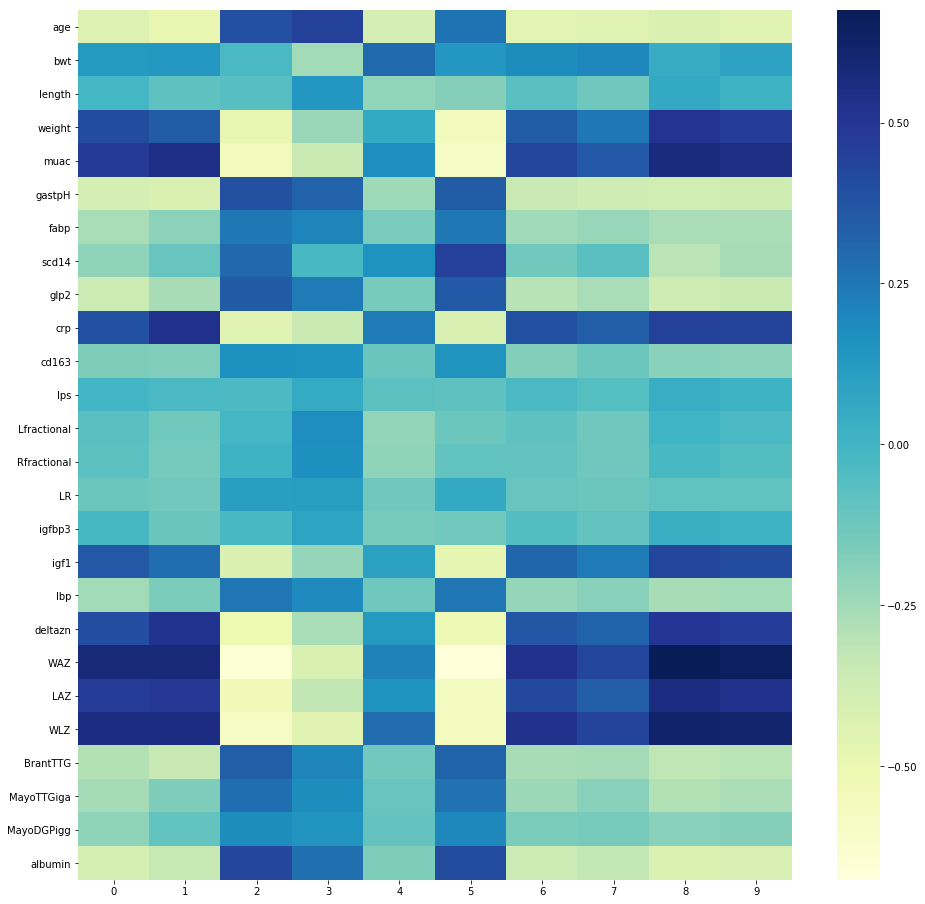

In [148]:
sns.heatmap(merge_ee.corr().iloc[10:, :10], cmap="YlGnBu")

In [150]:
merge_ee

,0,1,2,3,4,5,6,7,8,9,...,igf1,lbp,deltazn,WAZ,LAZ,WLZ,BrantTTG,MayoTTGiga,MayoDGPigg,albumin
0,2.391738,-0.559249,-5.085236,-2.491477,0.368771,-4.747418,3.764468,2.225109,10.468340,6.712342,...,12.975,147.633,93.840710,0.11,0.63,-0.22,2.019,0.48,1.109,14.0
1,-1.574233,-2.305845,3.552367,3.806101,-0.194752,1.455445,-1.270457,-0.625968,-1.415642,-2.355876,...,10.092,338.605,-70.373020,-6.72,-6.66,-5.90,2.498,1.99,2.392,23.0
2,-1.549492,-2.615883,3.592541,4.024995,-0.511371,1.210146,-1.277605,-0.911478,-1.177371,-2.161433,...,10.890,150.453,-118.687900,-3.10,-1.90,-2.94,2.179,0.56,2.658,21.0
3,-1.637867,-2.158816,4.143319,1.138533,1.110243,2.810053,-0.513103,-0.144187,-2.107219,-2.338015,...,12.717,169.724,5.912308,-4.44,-4.36,-2.76,2.141,0.71,36.290,46.0
4,-1.714978,-2.597270,3.030373,6.066260,-1.399415,0.386998,-1.749836,-1.285744,-0.685814,-2.181115,...,9.250,134.930,0.763145,-5.32,-3.94,-5.55,1.931,0.48,1.050,21.0
5,-1.555435,-2.533478,3.132907,4.893569,-0.758973,0.908911,-1.353999,-0.942921,-0.687669,-1.986958,...,9.250,189.534,-3.188649,-3.10,-2.33,-2.73,2.141,0.64,1.636,46.0
6,-1.464948,-2.232469,3.525955,3.551120,-0.210829,1.199754,-1.228785,-0.652490,-1.071955,-1.992402,...,18.974,143.367,0.646892,-3.60,-3.74,-2.26,2.002,0.51,3.173,40.0
7,-1.698318,-2.508544,3.152361,5.444011,-0.922076,0.695486,-1.589011,-1.063469,-0.780712,-2.204477,...,11.678,159.996,4.484533,-5.22,-3.70,-4.96,2.274,0.60,1.396,16.0
8,-1.356676,-2.578422,3.314873,3.674789,-0.451127,1.073166,-0.950064,-0.785423,-0.483112,-1.568734,...,10.493,258.240,-10.819270,-3.40,-3.10,-1.83,2.841,0.72,8.624,20.0
9,-1.880300,-2.366761,3.343552,5.650205,-1.082943,0.885129,-1.664757,-1.159950,-1.057413,-2.254167,...,9.250,530.000,7.694184,-3.31,-2.34,-2.80,2.141,1.09,102.166,18.0


In [98]:
len(biom_ee.iloc[1,:])

32